In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

teta = 1
betta = 0.95
n = 100

In [2]:
x_n = sps.uniform(loc = teta, scale = teta).rvs(size=n)
print(x_n)

[1.24038368 1.14987793 1.82251343 1.21219132 1.59633392 1.11744053
 1.98511229 1.05492999 1.64171319 1.98172751 1.77831997 1.80182347
 1.66222901 1.66419985 1.6690103  1.19322279 1.91195553 1.95917242
 1.97978164 1.88636946 1.94523549 1.04077996 1.9824296  1.03099622
 1.69816174 1.83397506 1.49298378 1.20543058 1.00450399 1.59328662
 1.21532547 1.22228798 1.21475778 1.63485907 1.89208248 1.00493369
 1.81123914 1.60827484 1.09333633 1.817401   1.44499072 1.8720673
 1.74505221 1.58144124 1.28968633 1.18946878 1.44377137 1.29315366
 1.78095229 1.05415869 1.04611387 1.92912235 1.20318867 1.78316418
 1.60320008 1.69477132 1.32543607 1.67278819 1.3974498  1.20460505
 1.50104284 1.7952323  1.08389252 1.07096618 1.78187021 1.44715988
 1.42785882 1.66372841 1.48190976 1.72490467 1.89536219 1.0612276
 1.16646378 1.43523715 1.66847196 1.49010284 1.89776351 1.28579629
 1.20931999 1.78430919 1.99656652 1.46617107 1.82870764 1.56081846
 1.58088624 1.59898457 1.31151978 1.8612136  1.81863995 1.045225

In [3]:
# Точный доверительный интервал

t1 = ((1 - betta) / 2) ** (1 / n)
t2 = ((1 + betta) / 2) ** (1 / n)
x_max = np.max(x_n)

board1_acc = x_max / (t2 + 1) 
board2_acc = x_max / (t1 + 1)
l = board2_acc - board1_acc
print("Доверительный интервал: (", board1_acc, ";", board2_acc, ")")
print("Длина доверительного интервала", l)

Доверительный интервал: ( 0.9984096326900637 ; 1.0166939063310707 )
Длина доверительного интервала 0.018284273641007043


In [4]:
# Асимптотический доверительный интервал (через метод моментов)

teta_omm = 2/3 * np.mean(x_n)
t1 = sps.norm(loc = 0, scale = 1).ppf((1-betta)/2)
t2 = sps.norm(loc = 0, scale = 1).ppf((1+betta)/2)
alpha1 = np.mean(x_n)
alpha2 = np.mean(x_n**2)

board1_mm = teta_omm - 2/3 * (alpha2 - alpha1**2)**0.5 * t2 / n**0.5
board2_mm = teta_omm - 2/3 * (alpha2 - alpha1**2)**0.5 * t1 / n**0.5
l = board2_mm - board1_mm
print("Доверительный интервал: (", board1_mm, ";", board2_mm, ")")
print("Длина доверительного интервала", l)

Доверительный интервал: ( 0.976567104193758 ; 1.0560637731843479 )
Длина доверительного интервала 0.07949666899058982


In [5]:
# Бутстраповский параметрический доверительный интервал (используется ОММ)

def get_bootstrap(x, n_sample):
    sample = np.random.choice(x, size = (x.size, n_sample), replace = True)
    return sample

N = 50000
x_boot = get_bootstrap(x_n, N)
x_boot_omm = np.sort(2/3 * np.mean(x_boot, axis = 0)) # вариац ряд
k1 = int((1 - betta) * N / 2)
k2 = int((1 + betta) * N / 2)

board1_boot = x_boot_omm[k1]
board2_boot = x_boot_omm[k2]
l = board2_boot - board1_boot
print("Доверительный интервал: (", board1_boot, ";", board2_boot, ")")
print("Длина доверительного интервала", l)

Доверительный интервал: ( 0.976799896346966 ; 1.055556360193945 )
Длина доверительного интервала 0.0787564638469791


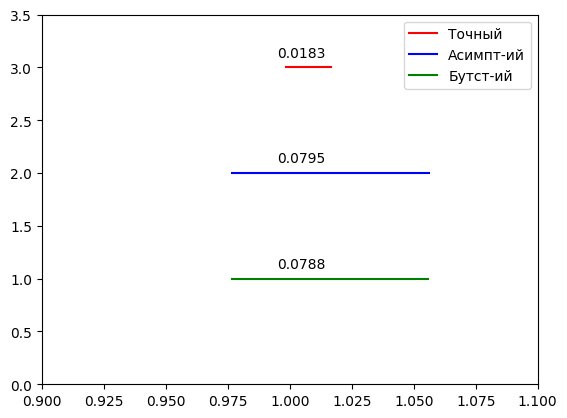

In [6]:
# Сравнение доверительных интервалов

plt.xlim(teta*0.9, teta*1.1)
plt.ylim(0, 3.5)

plt.text(teta - 0.005, 3.1, round(board2_acc - board1_acc, 4))
plt.plot([board1_acc, board2_acc], [3,3], color='r', label = "Точный")

plt.text(teta - 0.005, 2.1, round(board2_mm - board1_mm, 4))
plt.plot([board1_mm, board2_mm], [2,2], color='b', label = "Асимпт-ий")

plt.text(teta - 0.005, 1.1, round(board2_boot - board1_boot, 4))
plt.plot([board1_boot, board2_boot], [1,1], color='green', label = "Бутст-ий")
plt.legend()